# Introduction to excel with python 

Loading requried packages


In [188]:
import pandas as pd
import seaborn as sns
from openpyxl.workbook import Workbook
from openpyxl.chart import BarChart,Reference
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import PatternFill
from openpyxl.utils import get_column_letter
from openpyxl.worksheet.table import Table,TableStyleInfo


import os 


#### Loading dataset
loading the data contestants data set from excel file

In [189]:
contestants=pd.read_excel("C:\\Users\\Michael.Kalweo\\OneDrive - jubileekenya.com\\Documents\\excel practice\\modern-analytics-excel-book-main\\ch_12\\data\\contestants.xlsx")
os.chdir("c:\\users\\Michael.Kalweo\\documents\\data")

# Data Cleaning
correcting data formats filling missng values preparing it for analysis

In [190]:
contestants.head()

,EMAIL,PRE,POST,SEX,EDUCATION,STUDY_HOURS
0,smehaffey0@creativecommons.org,485,494,Male,Bachelor's,20.0
1,dbateman1@hao12@.com,462,458,Female,Bachelor's,14.8
2,bbenham2@xrea.com,477,483,Female,Bachelor's,22.2
3,mwison@@g.co,480,488,Female,Bachelor's,21.3
4,jagostini4@wordpress.org,495,494,Female,NaN,26.2


### Column formating 
Some of the headers are in uppercase for ease of typing will convert them to lower cas

In [191]:
contestants.columns=contestants.columns.str.lower()
contestants.head()

,email,pre,post,sex,education,study_hours
0,smehaffey0@creativecommons.org,485,494,Male,Bachelor's,20.0
1,dbateman1@hao12@.com,462,458,Female,Bachelor's,14.8
2,bbenham2@xrea.com,477,483,Female,Bachelor's,22.2
3,mwison@@g.co,480,488,Female,Bachelor's,21.3
4,jagostini4@wordpress.org,495,494,Female,NaN,26.2


### Data cleaning
using regular expession to clean up the irregural formated email address

In [192]:
email_pattern=r'^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w{2,3}$'
fullemails=contestants[contestants['email'].str.contains(email_pattern)]


#### Investigating the filltered out
To confirm how mandy rows have been filtered out by comparing the shape attribute of the two datasets

In [193]:
contestants.shape



(100, 6)

In [194]:
fullemails.shape

(82, 6)

#### Analyzing missing data 
info() offers a comprehensive overview of a dataframe's dimension and aditional properties

In [195]:
fullemails.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   email        82 non-null     object 
 1   pre          82 non-null     int64  
 2   post         82 non-null     int64  
 3   sex          82 non-null     object 
 4   education    81 non-null     object 
 5   study_hours  82 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.5+ KB


#### Percentage of nullvalues
Checking the columns with the heighest percentage of missing values.

In [196]:
fullemails.isnull().mean().sort_values(ascending=False)

education      0.012195
email          0.000000
pre            0.000000
post           0.000000
sex            0.000000
study_hours    0.000000
dtype: float64

#### Handling missing values
Because there are few missing values will drop any rows that has missing observation in any column.

In [197]:
complete_cases=fullemails.dropna()

##### Percentage rank
Create  percantage rank on the post column.To indicate the position of a particular value on the 

In [198]:
complete_cases["post_pct"]=complete_cases['post'].rank(pct=True)
complete_cases['post_pct'].describe().round(2)

C:\Users\Michael.Kalweo\AppData\Local\Temp\ipykernel_15872\883363476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_cases["post_pct"]=complete_cases['post'].rank(pct=True)


count    81.00
mean      0.51
std       0.29
min       0.01
25%       0.27
50%       0.51
75%       0.76
max       1.00
Name: post_pct, dtype: float64

In [199]:
complete_cases.describe().round(2)

,pre,post,study_hours,post_pct
count,81.00,81.00,81.00,81.00
mean,480.51,481.01,23.45,0.51
std,20.63,23.04,8.18,0.29
min,409.00,398.00,0.00,0.01
25%,470.00,467.00,18.70,0.27
50%,484.00,483.00,22.60,0.51
75%,494.00,497.00,29.00,0.76
max,521.00,540.00,42.80,1.00


### Creating an Excel report  with openpyxl
Create a detailed report 


In [200]:
#Create a new workbook and select the worksheet
wb=Workbook()
#Assign the active worksheet to ws
ws=wb.active
ws['A1']="Avarage pre score"
ws['B1']=round(complete_cases['pre'].mean())
ws['A2']="Average post score"
ws['B2']=round(complete_cases['post'].mean())

resizing the Average pre score column

In [201]:
ws.column_dimensions['A'].width=16


#### Charting using openpyxl


In [202]:
chart=BarChart()
data=Reference(ws,min_col=2,min_row=1,max_col=2,max_row=2)
#Add data to the chart
chart.add_data(data)
#set chart title,axis labels
chart.title="Score Comparison"
chart.x_axis.title="Score Type"
chart.y_axis.title="Score Value"
#chart.legend=
#Set category names
categories=Reference(ws,min_col=1,min_row=1,max_row=2)
#Remove the legend
#chart.legend=
#Add the chart to a specific location on the worksheet
ws.add_chart(chart,"D1")



##### Inserting a Python image


In [203]:
contestants

,email,pre,post,sex,education,study_hours
0,smehaffey0@creativecommons.org,485,494,Male,Bachelor's,20.0
1,dbateman1@hao12@.com,462,458,Female,Bachelor's,14.8
2,bbenham2@xrea.com,477,483,Female,Bachelor's,22.2
3,mwison@@g.co,480,488,Female,Bachelor's,21.3
4,jagostini4@wordpress.org,495,494,Female,NaN,26.2
...,...,...,...,...,...,...
95,lbydaway2n@uol.com.br,504,509,Male,Bachelor's,33.2
96,dashdown2o@technorati.com,496,494,Female,Master's,22.6
97,cpeplay2p@woothemes.com,472,476,Female,Bachelor's,22.7
98,dfaloon2q@google.es,494,501,Female,Bachelor's,29.3


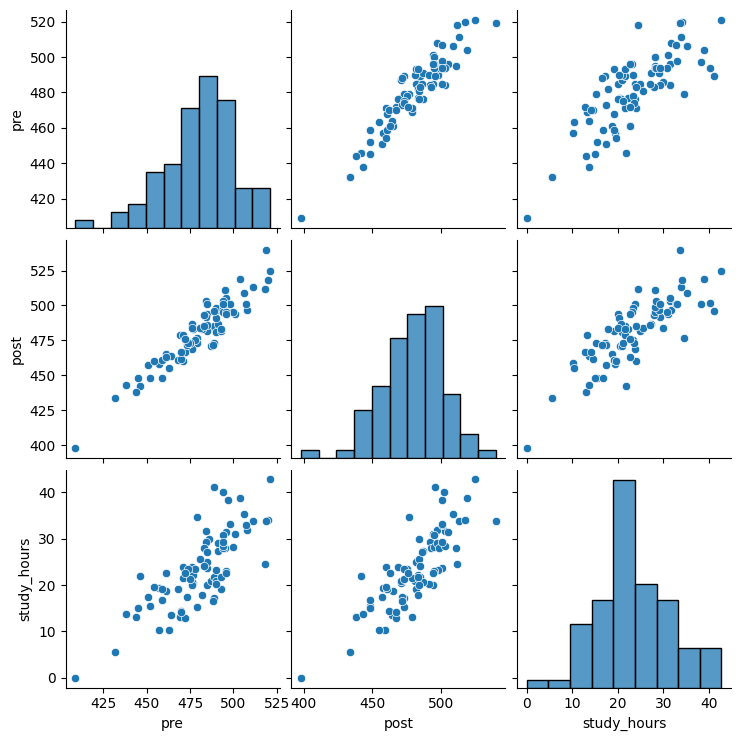

In [204]:
sns.pairplot(complete_cases[['pre','post','study_hours','sex']])

#### Beautifying the plot
Adding hue=sex to show the distribution of values based on gender'.

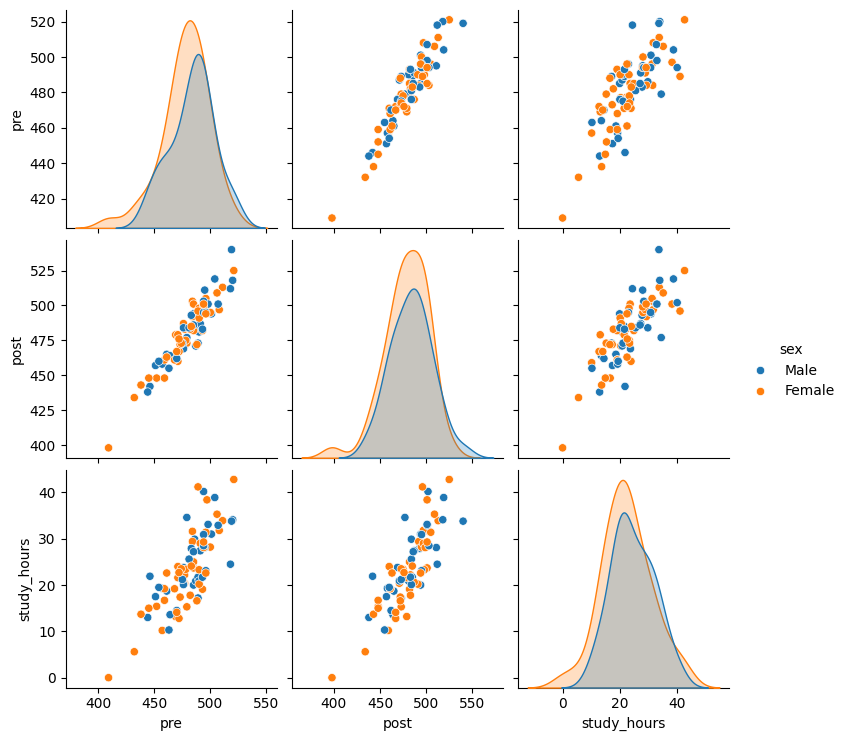

In [205]:
sns_plot=sns.pairplot(complete_cases[['pre','post','study_hours','sex']],hue='sex')
sns_plot.savefig('pairplot.png')
image=Image('pairplot.png')
ws.add_image(image,'A20')
wb.save('squid.xlsx')


##### Adding a styled data sorce

After extensive  the cleaned data to excel as a table and make imporvements on formats for user


In [206]:
ws2=wb.create_sheet(title='data')
for row in dataframe_to_rows(complete_cases,index=False,header=True):
    ws2.append(row)


##### Formating the Percentage Rank column
Converting the decimals to readable percentages.To address this will need to specify the location of this column in the workshee and reformat


In [207]:
post_pct_loc=complete_cases.columns.get_loc("post_pct")+1
post_pct_col=get_column_letter(post_pct_loc)
post_pct_col

number_format='0.0%'
for cell in ws2[post_pct_col]:
    cell.number_format=number_format
    

In [208]:
#Specify desired table formatting
style=TableStyleInfo(name='TableStyleMedium9',showRowStripes=True)
#name and identify range of table
table=Table(displayName='contestants',ref='A1:'+get_column_letter(ws2.max_column)+str(ws2.max_row))
#Apply styling and insert in worksheet
table.tableStyleInfo=style
ws2.add_table(table)

#### Applying conditional formating
For readerbility of endusers we can apply conditional formatting to the worksheet.The following code will apply green backgroudn fill to the participants abouve the 90th percentile and yellow background fill to participants above the 70th percentile

In [209]:
#Defind the conditional formatting style 
green_fill=PatternFill(start_color='B9E8A2',end_color='B9E8A2',fill_type='solid')
yellow_fill=PatternFill(start_color='FFF9D4',end_color='FFF9D4',fill_type='solid')
#looping through data table adn conditionally apply formatting
for row in ws2.iter_rows(min_row=2,min_col=1,max_col=len(complete_cases.columns)):
    post_pct=row[post_pct_loc-1].value
    #convert index to o-based indexing 
    if post_pct> .9:
        for cell in row:
            cell.fill=green_fill
    elif post_pct> .7:
        for cell in row:
            cell.fill=yellow_fill

#### Auto-fitting column widths
Since openpyxl lacks the Autofit feature we can achieve a similar outcome with the following code.It finrd the widest row in each column of the worksheet, then adds enought padding to adjust the column width accordingly

In [186]:
for column in ws2.columns:
    max_length=0
    column_letter=column[0].column_letter
    for cell in column:
        try:
            if len(str(cell.value))>max_length:
                max_length=len(cell.value)
        except:
            pass
        adjusted_width=(max_length+2)*1.2
        ws2.column_dimensions[column_letter].width=adjusted_width

### saving workbook


In [210]:
wb.save("ch12-output.xlsx")
wb.close()